In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
salaryExp = pd.read_csv('Salary_dataset.csv')

In [4]:
salaryExp.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
salaryExp.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [6]:
# Our features (x) is YearsExperience
# Our target (y) - salary 
years = salaryExp['YearsExperience']
salary = salaryExp['Salary']

In [7]:
years.shape, salary.shape

((30,), (30,))

In [8]:
# number of training examples m.
m = len(years)
print (m)

30


Text(0, 0.5, 'Salary')

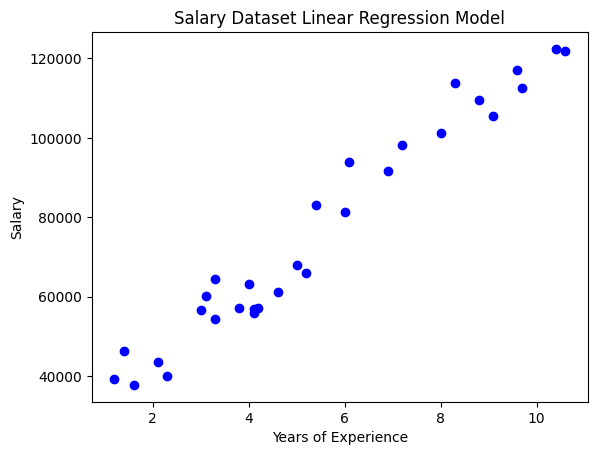

In [9]:
# visualise the data
import matplotlib.pyplot as plt
# creating a scatter plot changed the color to red and marker is o
plt.scatter(years, salary, marker = 'o', c = 'b')

# labeling the scatter plot
plt.title("Salary Dataset Linear Regression Model")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [10]:
# creating a random w, b and a (alpha)
w_manual = np.random.randn()
b_manual = np.random.randn()
alpha = 0.0001
print (f'w_random: {w_manual}')
print (f'b_random: {b_manual}')
print (alpha)

w_random: -2.0247465748356883
b_random: -0.20748218270817054
0.0001


In [11]:
# creating a line using our initial guess
def line_guess(X, w, b):
    y_guess = []
    for x_value in X:
        y_value = (w * x_value) + b
        y_guess.append(y_value)
    return y_guess

f_wb = line_guess(years, w_manual, b_manual)
print (f_wb)

[-2.637178072510997, -3.042127387478134, -3.447076702445272, -4.459449989863117, -4.864399304830254, -6.2817219072152355, -6.484196564698804, -6.889145879665943, -6.889145879665943, -7.901519167083785, -8.306468482050924, -8.508943139534493, -8.508943139534493, -8.711417797018061, -9.521316426952337, -10.331215056886613, -10.736164371853748, -11.141113686820887, -12.3559616317223, -12.558436289205869, -14.178233549074418, -14.785657521525126, -16.405454781393676, -17.01287875384438, -18.025252041262224, -18.63267601371293, -19.645049301130776, -19.847523958614346, -21.264846560999327, -21.669795875966464]


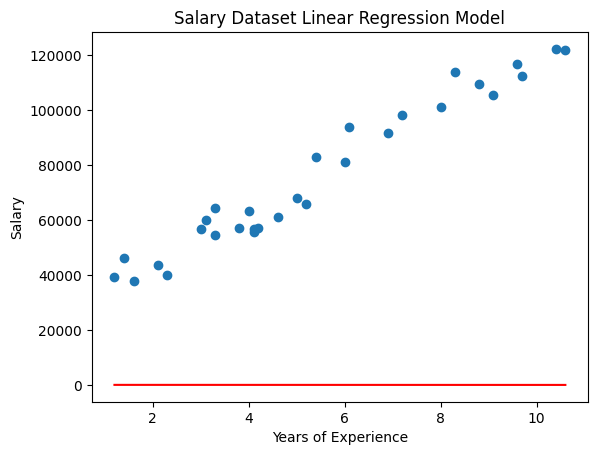

In [12]:
plt.scatter(years, salary)

init_salary_guess = line_guess(years, w_manual, b_manual)
# labeling the scatter plot
plt.title("Salary Dataset Linear Regression Model")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.plot(years, init_salary_guess, c = 'r')

In [13]:
def calculate_cost(X, y, w, b):
    m = len(X)
    cost = 0
    f_wb = line_guess(X, w, b)
    for i in range(len(f_wb)):
        cost_i = (f_wb[i] - y[i]) ** 2
        cost += cost_i
    j_wb = cost / (2 * m)
    return j_wb

f_wb = line_guess(years, w_manual, b_manual)
cost = calculate_cost(years, salary, w_manual, b_manual)
print(f_wb)
print(cost)

[-2.637178072510997, -3.042127387478134, -3.447076702445272, -4.459449989863117, -4.864399304830254, -6.2817219072152355, -6.484196564698804, -6.889145879665943, -6.889145879665943, -7.901519167083785, -8.306468482050924, -8.508943139534493, -8.508943139534493, -8.711417797018061, -9.521316426952337, -10.331215056886613, -10.736164371853748, -11.141113686820887, -12.3559616317223, -12.558436289205869, -14.178233549074418, -14.785657521525126, -16.405454781393676, -17.01287875384438, -18.025252041262224, -18.63267601371293, -19.645049301130776, -19.847523958614346, -21.264846560999327, -21.669795875966464]
3252551497.6885085


In [14]:
def compute_gradient(X, y, w, b):
    f_wb = line_guess(X, w, b)
    db = 0
    dw = 0
    for i in range(len(f_wb)):
        dw_i = (f_wb[i] - y[i] ) * X[i] 
        db_i = f_wb[i] - y[i]
        dw += dw_i
        db += db_i
    db = db / m
    dw = dw / m
    return db, dw
compute_gradient(years, salary, w_manual, b_manual)

(np.float64(-76015.16811030782), np.float64(-485080.63300417864))

In [15]:
def gradient_descent(X, y, w, b, calculate_cost, compute_gradient, alpha, num_iters):
    m = len(X)
    w_final = w
    b_final = b
    for i in range(num_iters):
        db, dw = compute_gradient(X, y, w_final, b_final)
        w_final = w_final - alpha * dw
        b_final = b_final - alpha * db
    return w_final, b_final

gradient_descent(years, salary, w_manual, b_manual, calculate_cost, compute_gradient, 0.01, 1000)

(np.float64(9880.81235761627), np.float64(21912.60040602907))

In [16]:
m = len(years)
predicted = np.zeros(m)
w, b = gradient_descent(years, salary, w_manual, b_manual, calculate_cost, compute_gradient, 0.01, 1000)
for i in range(m):
    predicted[i] = w * years[i] + b
predicted

array([ 33769.57523517,  35745.73770669,  37721.90017822,  42662.30635702,
        44638.46882855,  51555.03747888,  52543.11871464,  54519.28118616,
        54519.28118616,  59459.68736497,  61435.84983649,  62423.93107226,
        62423.93107226,  63412.01230802,  67364.33725106,  71316.66219411,
        73292.82466563,  75268.98713716,  81197.47455173,  82185.55578749,
        90090.20567358,  93054.44938087, 100959.09926696, 103923.34297424,
       108863.74915305, 111827.99286034, 116768.39903915, 117756.48027491,
       124673.04892524, 126649.21139676])

Text(0, 0.5, 'Salary')

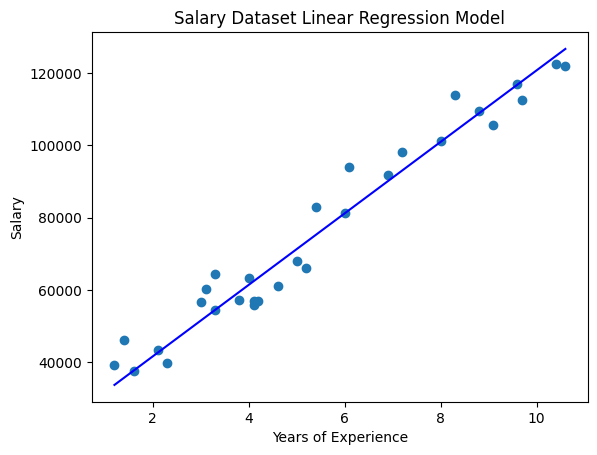

In [17]:
plt.plot (years, predicted, c = 'b')

plt.scatter(years, salary)

init_salary_guess = line_guess(years, w_manual, b_manual)
# labeling the scatter plot
plt.title("Salary Dataset Linear Regression Model")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')



In [18]:
def guesser(x):
    w_final, b_final = (gradient_descent(years, salary, w_manual, b_manual, calculate_cost, compute_gradient, 0.01, 1500))
    y_guess = w_final * x + b_final
    return y_guess
guesser(4.7)

np.float64(68937.46516544378)